In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')
df.head()


,Location,Date,Temperature_Max,Temperature_Min,Précipitations,Humidity,Wind_Speed,PM2_5,CO2_Ambient_Level,Solar_Radiation
0,Tunis,2020-01-01,15.0,6.6,0.3,41,10.2,31,0.93,116.4
1,Tunis,2020-01-02,16.0,4.0,0.0,28,8.2,106,1.09,661.9
2,Tunis,2020-01-03,16.2,6.8,0.0,69,8.4,52,1.38,316.5
3,Tunis,2020-01-04,15.7,10.0,0.0,42,14.0,52,0.39,533.2
4,Tunis,2020-01-05,16.6,11.8,0.0,27,17.1,112,1.04,728.1


In [11]:
# Afficher le type de chaque colonne
print("\nTypes de données des colonnes :")
print(df.dtypes)


Types de données des colonnes :
Location                     object
Date                 datetime64[ns]
Temperature_Max             float64
Temperature_Min             float64
Précipitations              float64
Humidity                      int64
Wind_Speed                  float64
PM2_5                         int64
CO2_Ambient_Level           float64
Solar_Radiation             float64
dtype: object


In [45]:
import pandas as pd
from tabulate import tabulate

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Liste des descriptions connues
descriptions_connues = {
    'Location': 'Emplacement de la mesure',
    'Date': 'Date et heure de l\'enregistrement',
    'Temperature': 'Température en degrés Celsius',
    'Humidity': 'Humidité relative en %',
    'Wind_Speed': 'Vitesse du vent en km/h',
    'CO2': 'Niveau de CO2 ambiant en ppm',
    'CO2_Ambient_Level': 'Concentration de CO2 dans l\'atmosphère (ppm)',
    'PM2_5': 'Concentration de particules fines (µg/m³)',
    'Solar_Radiation': 'Rayonnement solaire en W/m²'
}

# Vérifier et ajouter les nouvelles colonnes avec des valeurs par défaut si elles n'existent pas
if 'Solar_Radiation' not in df.columns:
    df['Solar_Radiation'] = 0  # Valeur par défaut

if 'CO2_Ambient_Level' not in df.columns:
    df['CO2_Ambient_Level'] = df.get('CO2', 0)  # Copier CO2 si disponible, sinon 0

# Générer une description pour chaque colonne
descriptions = [descriptions_connues.get(col, "Description non disponible") for col in df.columns]

# Création du dictionnaire de données
data_dict = {
    'Nom de la colonne': df.columns,
    'Type de données': df.dtypes.values,
    'Description': descriptions
}

# Création d'un DataFrame pour le dictionnaire de données
dict_df = pd.DataFrame(data_dict)

# Affichage du dictionnaire de données sous forme de tableau avec tabulate
print("Dictionnaire de Données :")
print(tabulate(dict_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Dictionnaire de Données :
╒═════════════════════╤═══════════════════╤══════════════════════════════════════════════╕
│ Nom de la colonne   │ Type de données   │ Description                                  │
╞═════════════════════╪═══════════════════╪══════════════════════════════════════════════╡
│ Location            │ object            │ Emplacement de la mesure                     │
├─────────────────────┼───────────────────┼──────────────────────────────────────────────┤
│ Date                │ datetime64[ns]    │ Date et heure de l'enregistrement            │
├─────────────────────┼───────────────────┼──────────────────────────────────────────────┤
│ Temperature_Max     │ float64           │ Description non disponible                   │
├─────────────────────┼───────────────────┼──────────────────────────────────────────────┤
│ Temperature_Min     │ float64           │ Description non disponible                   │
├─────────────────────┼───────────────────┼─────────────────────

In [47]:
import pandas as pd
from tabulate import tabulate

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Convertir les premières valeurs en string pour éviter les erreurs NaN
exemples = df.head(5).astype(str).to_dict(orient='records')

# Dictionnaires des descriptions et unités de mesure
descriptions = {
    'Location': 'Emplacement de la mesure',
    'Date': 'Date et heure de l\'enregistrement',
    'Temperature': 'Température en degrés Celsius',
    'Humidity': 'Humidité relative en %',
    'Wind_Speed': 'Vitesse du vent en km/h',
    'CO2_Ambient_Level': 'Niveau de CO2 ambiant en ppm',
    'Solar_Radiation': 'Rayonnement solaire en W/m²'
}

unites = {
    'Location': 'N/A',
    'Date': 'N/A',
    'Temperature': '°C',
    'Humidity': '%',
    'Wind_Speed': 'km/h',
    'CO2_Ambient_Level': 'ppm',
    'Solar_Radiation': 'W/m²'
}

# Générer les informations des colonnes existantes
data_dict = {
    'Nom de la colonne': df.columns,
    'Type de données': df.dtypes.values,
    'Description': [descriptions.get(col, "Description non disponible") for col in df.columns],
    'Unité de mesure': [unites.get(col, "N/A") for col in df.columns],
    'Exemple de données': [exemples[0].get(col, "N/A") if exemples else "N/A" for col in df.columns]
}

# Création d'un DataFrame pour le dictionnaire de données
dict_df = pd.DataFrame(data_dict)

# Affichage du dictionnaire de données sous forme de tableau avec tabulate
print("Dictionnaire de Données :")
print(tabulate(dict_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Dictionnaire de Données :
╒═════════════════════╤═══════════════════╤═══════════════════════════════════╤═══════════════════╤══════════════════════╕
│ Nom de la colonne   │ Type de données   │ Description                       │ Unité de mesure   │ Exemple de données   │
╞═════════════════════╪═══════════════════╪═══════════════════════════════════╪═══════════════════╪══════════════════════╡
│ Location            │ object            │ Emplacement de la mesure          │ N/A               │ Tunis                │
├─────────────────────┼───────────────────┼───────────────────────────────────┼───────────────────┼──────────────────────┤
│ Date                │ datetime64[ns]    │ Date et heure de l'enregistrement │ N/A               │ 2020-01-01           │
├─────────────────────┼───────────────────┼───────────────────────────────────┼───────────────────┼──────────────────────┤
│ Temperature_Max     │ float64           │ Description non disponible        │ N/A               │ 15.0         

In [49]:
import pandas as pd

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Vérifier si le DataFrame est vide
if df.empty:
    raise ValueError("Le fichier JSON est vide ou ne contient pas de données valides.")

# Dictionnaire des descriptions par colonne connue
descriptions_connues = {
    'Location': 'Emplacement de la mesure',
    'Date': 'Date et heure de l\'enregistrement',
    'Temperature': 'Température en degrés Celsius',
    'Humidity': 'Humidité relative en %',
    'Wind_Speed': 'Vitesse du vent en km/h',
    'CO2_Ambient_Level': 'Niveau de CO2 ambiant en ppm',
    'Solar_Radiation': 'Rayonnement solaire en W/m²'
}

# Générer les descriptions en fonction des colonnes du DataFrame
descriptions = [descriptions_connues.get(col, "Description non disponible") for col in df.columns]

# Création du dictionnaire de données
data_dict = {
    'Nom de la colonne': df.columns,
    'Type de données': df.dtypes.values,
    'Description': descriptions
}

# Création d'un DataFrame pour le dictionnaire de données
dict_df = pd.DataFrame(data_dict)

# Affichage du dictionnaire de données sous forme de tableau
print("Dictionnaire de Données :")
print(dict_df.to_string(index=False))


Dictionnaire de Données :
Nom de la colonne Type de données                       Description
         Location          object          Emplacement de la mesure
             Date  datetime64[ns] Date et heure de l'enregistrement
  Temperature_Max         float64        Description non disponible
  Temperature_Min         float64        Description non disponible
   Précipitations         float64        Description non disponible
         Humidity           int64            Humidité relative en %
       Wind_Speed         float64           Vitesse du vent en km/h
            PM2_5           int64        Description non disponible
CO2_Ambient_Level         float64      Niveau de CO2 ambiant en ppm
  Solar_Radiation         float64       Rayonnement solaire en W/m²


In [27]:
info_df = pd.DataFrame({
    "Colonne": df.columns,
    "Type": df.dtypes.values,
    "Valeurs non nulles": df.count().values,
    "Total": len(df),
    "Pourcentage complet": (df.count() / len(df) * 100).map(lambda x: f"{x:.1f}%")
})

# Affichage propre
display(info_df)

,Colonne,Type,Valeurs non nulles,Total,Pourcentage complet
Location,Location,object,9185,9185,100.0%
Date,Date,datetime64[ns],9185,9185,100.0%
Temperature_Max,Temperature_Max,float64,9185,9185,100.0%
Temperature_Min,Temperature_Min,float64,9185,9185,100.0%
Précipitations,Précipitations,float64,9185,9185,100.0%
Humidity,Humidity,int64,9185,9185,100.0%
Wind_Speed,Wind_Speed,float64,9185,9185,100.0%
PM2_5,PM2_5,int64,9185,9185,100.0%
CO2_Ambient_Level,CO2_Ambient_Level,float64,9185,9185,100.0%
Solar_Radiation,Solar_Radiation,float64,9185,9185,100.0%


In [29]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Nombre de valeurs manquantes': missing_values,
    'Pourcentage': missing_percentage.map(lambda x: f"{x:.1f}%")
}).sort_values(by="Nombre de valeurs manquantes", ascending=False)

display(missing_df.style.background_gradient(cmap="Reds"))

,Nombre de valeurs manquantes,Pourcentage
Location,0,0.0%
Date,0,0.0%
Temperature_Max,0,0.0%
Temperature_Min,0,0.0%
Précipitations,0,0.0%
Humidity,0,0.0%
Wind_Speed,0,0.0%
PM2_5,0,0.0%
CO2_Ambient_Level,0,0.0%
Solar_Radiation,0,0.0%


In [31]:
import pandas as pd

# Charger le JSON dans un DataFrame
df = pd.read_json('Climate_Environmental_Data.json')

# Calcul du nombre de valeurs manquantes et du pourcentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Formatage en ajoutant le symbole '%'
missing_percentage = missing_percentage.map(lambda x: f"{x:.1f}%")

# Création d'un DataFrame pour stocker les résultats
missing_df = pd.DataFrame({
    'Nombre de valeurs manquantes': missing_values,
    'Pourcentage de valeurs manquantes': missing_percentage
})

# Enregistrement dans un fichier Excel
missing_df.to_excel('valeurs_manquantes.xlsx', index=True)

print("Le fichier 'valeurs_manquantes.xlsx' a été créé avec succès.")


Le fichier 'valeurs_manquantes.xlsx' a été créé avec succès.


In [33]:
print("\n📈 Statistiques descriptives :")
display(df.describe())


📈 Statistiques descriptives :


,Date,Temperature_Max,Temperature_Min,Précipitations,Humidity,Wind_Speed,PM2_5,CO2_Ambient_Level,Solar_Radiation
count,9185,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000
mean,2022-07-06 23:59:59.999999744,26.562569,16.202286,0.548634,48.043332,12.231083,80.302014,0.849571,492.065052
min,2020-01-01 00:00:00,9.000000,-45.000000,0.000000,20.000000,0.200000,10.000000,0.200000,50.300000
25%,2021-04-04 00:00:00,20.200000,10.900000,0.000000,35.000000,8.000000,46.000000,0.530000,239.500000
50%,2022-07-07 00:00:00,26.000000,16.000000,0.000000,48.000000,11.500000,80.000000,0.840000,468.200000
75%,2023-10-09 00:00:00,32.000000,22.000000,0.000000,61.000000,15.500000,115.000000,1.170000,734.300000
max,2025-01-10 00:00:00,50.300000,31.600000,91.700000,90.000000,46.500000,150.000000,1.500000,999.900000
std,NaN,7.440310,6.552075,3.048855,16.324750,5.642188,40.312866,0.374630,276.119661


In [35]:
print(df.isnull().sum())

Location             0
Date                 0
Temperature_Max      0
Temperature_Min      0
Précipitations       0
Humidity             0
Wind_Speed           0
PM2_5                0
CO2_Ambient_Level    0
Solar_Radiation      0
dtype: int64


In [37]:

num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"📊 Colonnes numériques : {num_cols}")
print(f"🔠 Colonnes catégorielles : {cat_cols}")

📊 Colonnes numériques : ['Temperature_Max', 'Temperature_Min', 'Précipitations', 'Humidity', 'Wind_Speed', 'PM2_5', 'CO2_Ambient_Level', 'Solar_Radiation']
🔠 Colonnes catégorielles : ['Location']


In [41]:

for col in cat_cols:
    print(f"📌 {col}: {df[col].nunique()} valeurs uniques")
    print(df[col].value_counts().head(5))  # Afficher les 5 valeurs les plus courantes
    print("-" * 40)

📌 Location: 5 valeurs uniques
Location
Tunis       1837
Sfax        1837
Sousse      1837
Kairouan    1837
Gabès       1837
Name: count, dtype: int64
----------------------------------------


Colonnes disponibles : Index(['Location', 'Date', 'Temperature_Max', 'Temperature_Min',
       'Précipitations', 'Humidity', 'Wind_Speed', 'PM2_5',
       'CO2_Ambient_Level', 'Solar_Radiation'],
      dtype='object')


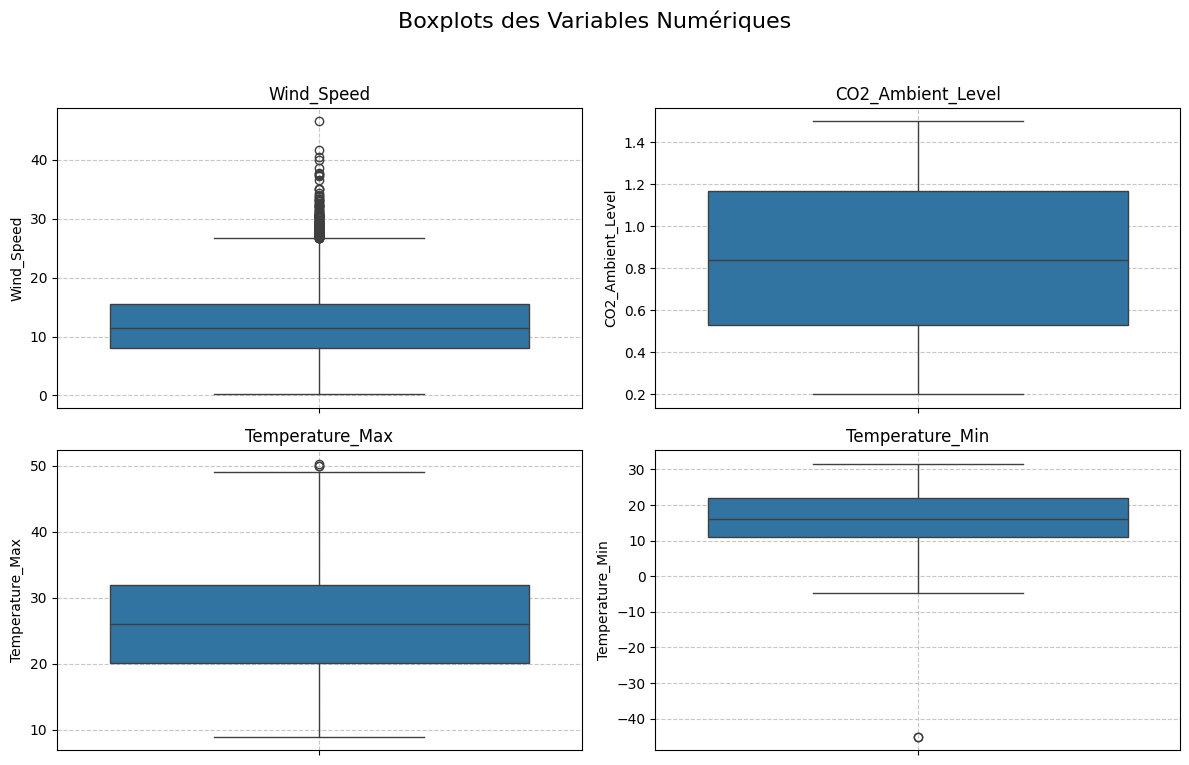

--- Wind_Speed ---
Min : 0.2
Q1 (25%) : 8.0
Médiane (50%) : 11.5
Q3 (75%) : 15.5
Max : 46.5

IQR (Intervalle Interquartile) : 7.5
Présence de valeurs aberrantes : Oui
Nombre de valeurs aberrantes : 160


--- CO2_Ambient_Level ---
Min : 0.2
Q1 (25%) : 0.53
Médiane (50%) : 0.84
Q3 (75%) : 1.17
Max : 1.5

IQR (Intervalle Interquartile) : 0.6399999999999999
Présence de valeurs aberrantes : Non
Nombre de valeurs aberrantes : 0


--- Temperature_Max ---
Min : 9.0
Q1 (25%) : 20.2
Médiane (50%) : 26.0
Q3 (75%) : 32.0
Max : 50.3

IQR (Intervalle Interquartile) : 11.8
Présence de valeurs aberrantes : Oui
Nombre de valeurs aberrantes : 3


--- Temperature_Min ---
Min : -45.0
Q1 (25%) : 10.9
Médiane (50%) : 16.0
Q3 (75%) : 22.0
Max : 31.6

IQR (Intervalle Interquartile) : 11.1
Présence de valeurs aberrantes : Oui
Nombre de valeurs aberrantes : 2




In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

pd.set_option('future.no_silent_downcasting', False)

# Vérifier les colonnes disponibles
print("Colonnes disponibles :", df.columns)

# Vérifier les noms réels des colonnes et corriger si nécessaire
column_mapping = {
    'Temperature_Max': 'Temperature_Max',
    'Temperature_Min':'Temperature_Min',
    'Solar_Radiation':'Solar_Radiation',
    'Wind_Speed': 'Vitesse du vent',
    'Humidity': 'Humidité',
    'CO2_Ambient_Level': 'CO2 Ambiant'
}

# Renommer les colonnes si elles existent
df.rename(columns={v: k for k, v in column_mapping.items()}, inplace=True)


# Liste des colonnes numériques à tracer
numeric_columns = ['Wind_Speed','Solar_Radiation' 'Humidity', 'CO2_Ambient_Level','Temperature_Max', 'Temperature_Min']
numeric_columns = [col for col in numeric_columns if col in df.columns]  # Vérifier l'existence

# Affichage des statistiques descriptives
stats = df[numeric_columns].describe()

# Tracer les boxplots en grille
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplots des Variables Numériques", fontsize=16)

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel("")
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interprétation des statistiques
for col in numeric_columns:
    print(f"--- {col} ---")
    print(f"Min : {stats.loc['min', col]}")
    print(f"Q1 (25%) : {stats.loc['25%', col]}")
    print(f"Médiane (50%) : {stats.loc['50%', col]}")
    print(f"Q3 (75%) : {stats.loc['75%', col]}")
    print(f"Max : {stats.loc['max', col]}\n")

    # Calcul de l'IQR (Interquartile Range)
    IQR = stats.loc['75%', col] - stats.loc['25%', col]
    print(f"IQR (Intervalle Interquartile) : {IQR}")

    # Détection des valeurs aberrantes
    lower_bound = stats.loc['25%', col] - 1.5 * IQR
    upper_bound = stats.loc['75%', col] + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Présence de valeurs aberrantes : {'Oui' if not outliers.empty else 'Non'}")
    print(f"Nombre de valeurs aberrantes : {outliers.shape[0]}")
    print("\n")


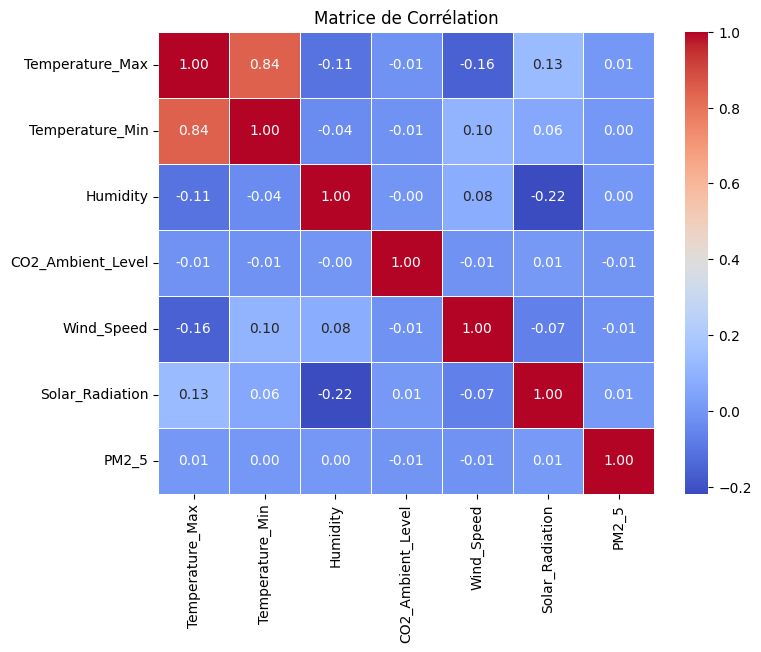

Corrélation entre Temperature_Max et Temperature_Min : 0.84 → Forte corrélation positive : les deux variables évoluent ensemble.

Corrélation entre Temperature_Max et Humidity : -0.11 → Corrélation faible négative : influence limitée.

Corrélation entre Temperature_Max et CO2_Ambient_Level : -0.01 → Aucune corrélation significative.

Corrélation entre Temperature_Max et Wind_Speed : -0.16 → Corrélation faible négative : influence limitée.

Corrélation entre Temperature_Max et Solar_Radiation : 0.13 → Corrélation faible : peu d'influence entre ces variables.

Corrélation entre Temperature_Max et PM2_5 : 0.01 → Aucune corrélation significative.

Corrélation entre Temperature_Min et Temperature_Max : 0.84 → Forte corrélation positive : les deux variables évoluent ensemble.

Corrélation entre Temperature_Min et Humidity : -0.04 → Aucune corrélation significative.

Corrélation entre Temperature_Min et CO2_Ambient_Level : -0.01 → Aucune corrélation significative.

Corrélation entre Temperatu

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Liste des colonnes numériques
numeric_columns = ['Temperature_Max', 'Temperature_Min', 'Humidity', 'CO2_Ambient_Level', 'Wind_Speed','Solar_Radiation','PM2_5']

# Convertir les colonnes numériques en valeurs numériques (en remplaçant les erreurs par NaN)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Gérer les valeurs manquantes (ici on peut choisir de les remplir par la moyenne ou la médiane)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Remplir par la moyenne

# Calcul de la matrice de corrélation
corr_matrix = df[numeric_columns].corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

# Interprétation des corrélations
def interpret_correlation(value):
    """Retourne une interprétation de la corrélation en fonction de sa valeur."""
    if value > 0.7:
        return "Forte corrélation positive : les deux variables évoluent ensemble."
    elif value > 0.4:
        return "Corrélation modérée : il y a une tendance mais pas systématique."
    elif value > 0.1:
        return "Corrélation faible : peu d'influence entre ces variables."
    elif value < -0.7:
        return "Forte corrélation négative : quand l'une augmente, l'autre diminue fortement."
    elif value < -0.4:
        return "Corrélation modérée négative : tendance inverse présente."
    elif value < -0.1:
        return "Corrélation faible négative : influence limitée."
    else:
        return "Aucune corrélation significative."

# Affichage de l'interprétation
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            corr_value = corr_matrix.loc[col1, col2]
            print(f"Corrélation entre {col1} et {col2} : {corr_value:.2f} → {interpret_correlation(corr_value)}\n")


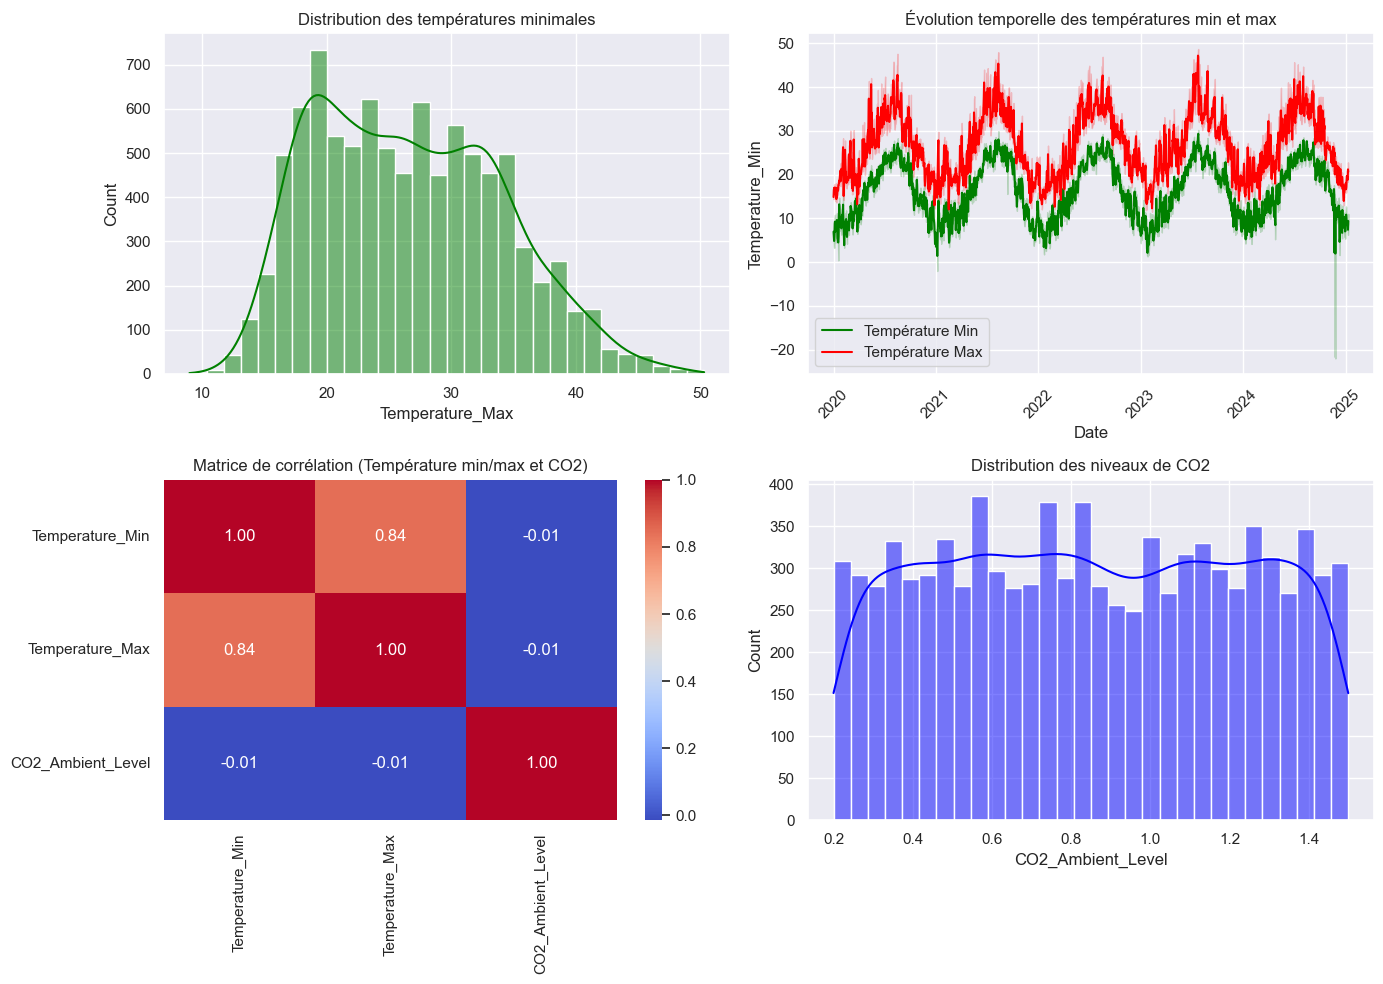

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Vérifier les colonnes nécessaires
required_columns = ["Date", "Temperature_Min", "Temperature_Max", "CO2_Ambient_Level"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Les colonnes suivantes sont manquantes dans le fichier : {missing_columns}")

# Conversion de la colonne Date en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Style des graphiques
sns.set_theme(style="darkgrid")

# Création des figures
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution des températures minimales
sns.histplot(df["Temperature_Max"], bins=30, kde=True, ax=axes[0, 0], color="green")
axes[0, 0].set_title("Distribution des températures minimales")

# 2. Évolution temporelle des températures min et max
sns.lineplot(data=df, x="Date", y="Temperature_Min", label="Température Min", ax=axes[0, 1], color="green")
sns.lineplot(data=df, x="Date", y="Temperature_Max", label="Température Max", ax=axes[0, 1], color="red")
axes[0, 1].set_title("Évolution temporelle des températures min et max")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Matrice de corrélation avec seulement les colonnes sélectionnées
corr_columns = ["Temperature_Min", "Temperature_Max", "CO2_Ambient_Level"]
corr_matrix = df[corr_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title("Matrice de corrélation (Température min/max et CO2)")

# 4. Distribution des niveaux de CO₂
sns.histplot(df["CO2_Ambient_Level"], bins=30, kde=True, ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Distribution des niveaux de CO2")

plt.tight_layout()
plt.show()


C:\Users\lapte\AppData\Local\Temp\ipykernel_30548\2459459830.py:54: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\lapte\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


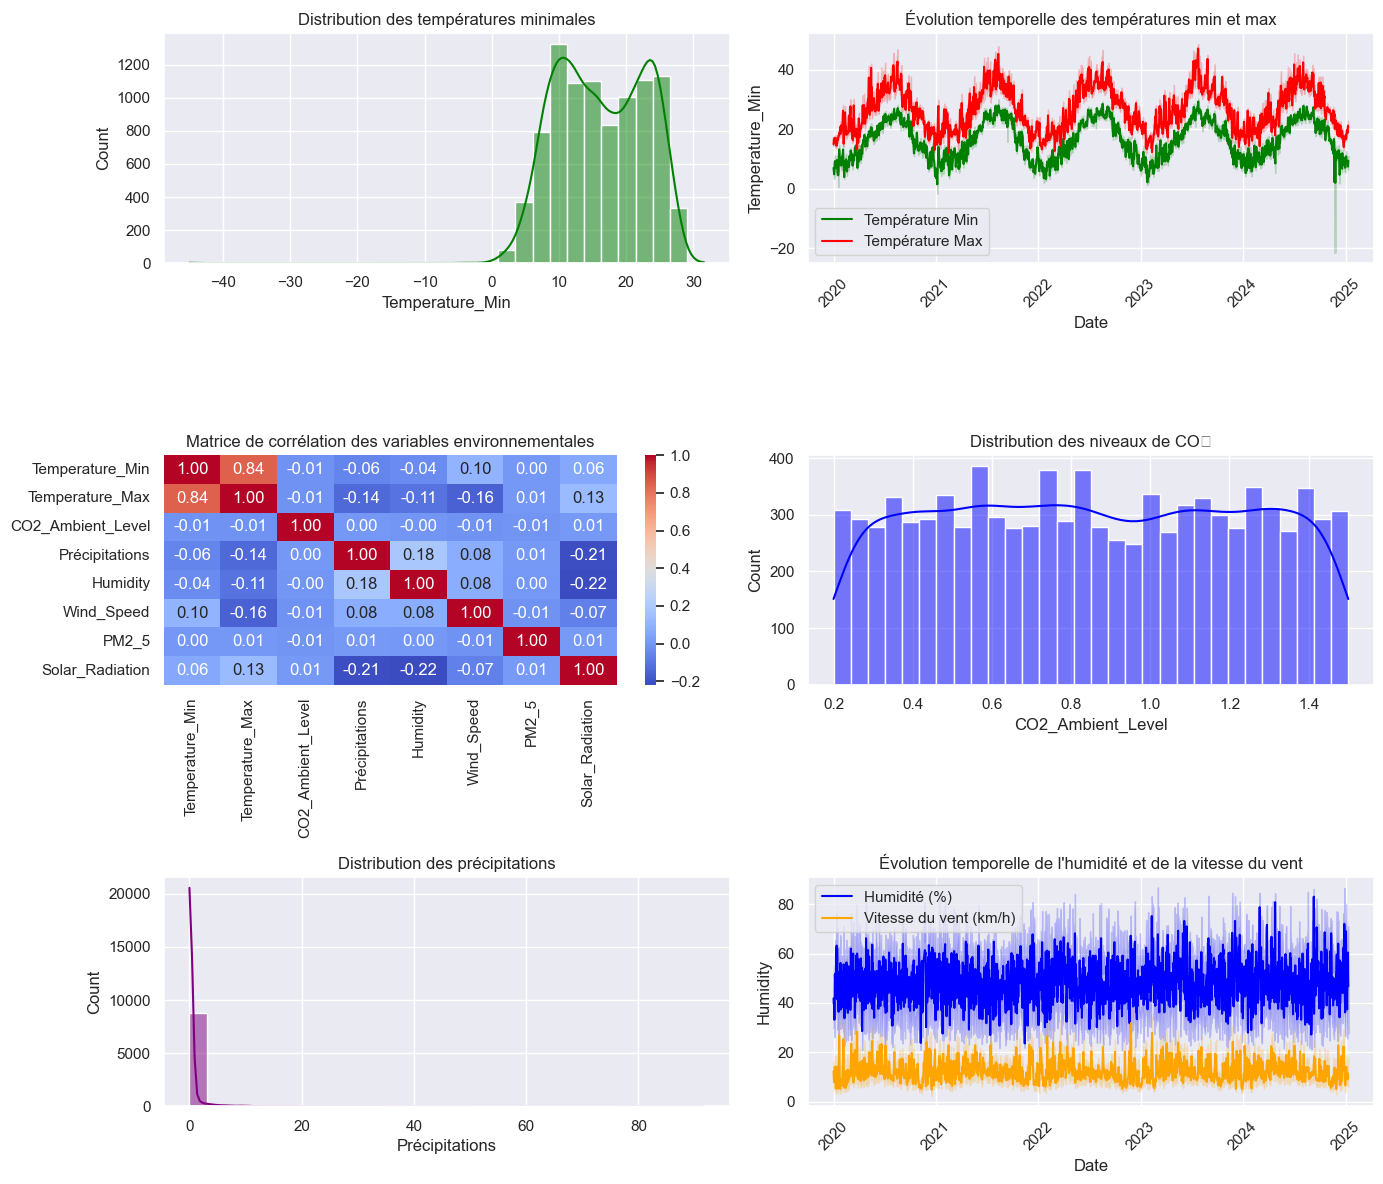

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_json('Climate_Environmental_Data.json')

# Vérifier les colonnes nécessaires
required_columns = ["Date", "Temperature_Min", "Temperature_Max", "CO2_Ambient_Level", "Précipitations", "Humidity", "Wind_Speed", "PM2_5", "Solar_Radiation"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Les colonnes suivantes sont manquantes dans le fichier : {missing_columns}")

# Conversion de la colonne Date en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Style des graphiques
sns.set_theme(style="darkgrid")

# Création des figures
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. Distribution des températures minimales
sns.histplot(df["Temperature_Min"], bins=30, kde=True, ax=axes[0, 0], color="green")
axes[0, 0].set_title("Distribution des températures minimales")

# 2. Évolution temporelle des températures min et max
sns.lineplot(data=df, x="Date", y="Temperature_Min", label="Température Min", ax=axes[0, 1], color="green")
sns.lineplot(data=df, x="Date", y="Temperature_Max", label="Température Max", ax=axes[0, 1], color="red")
axes[0, 1].set_title("Évolution temporelle des températures min et max")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Matrice de corrélation avec toutes les colonnes pertinentes
corr_columns = ["Temperature_Min", "Temperature_Max", "CO2_Ambient_Level", "Précipitations", "Humidity", "Wind_Speed", "PM2_5", "Solar_Radiation"]
corr_matrix = df[corr_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title("Matrice de corrélation des variables environnementales")

# 4. Distribution des niveaux de CO₂
sns.histplot(df["CO2_Ambient_Level"], bins=30, kde=True, ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Distribution des niveaux de CO₂")

# 5. Distribution des précipitations
sns.histplot(df["Précipitations"], bins=30, kde=True, ax=axes[2, 0], color="purple")
axes[2, 0].set_title("Distribution des précipitations")

# 6. Évolution temporelle de l'humidité et de la vitesse du vent
sns.lineplot(data=df, x="Date", y="Humidity", label="Humidité (%)", ax=axes[2, 1], color="blue")
sns.lineplot(data=df, x="Date", y="Wind_Speed", label="Vitesse du vent (km/h)", ax=axes[2, 1], color="orange")
axes[2, 1].set_title("Évolution temporelle de l'humidité et de la vitesse du vent")
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
